In [174]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from tabulate import tabulate

In [175]:
# Carregar os dados
dados = pd.read_stata("dados/ijio_replication_didapps.dta")

# Calcular os logaritmos das variáveis normalizadas
dados['lnusers'] = np.log(dados['norm_users'])
dados['lnpurch_users'] = np.log(dados['norm_purch_users'])
dados['lnvideos'] = np.log(dados['norm_videos'])
dados

,game,country,platform,dt,norm_users,norm_purch_users,norm_videos,purchsmooth,year,month,...,google,post,window,userssmooth,postxapple,forpan,cgn,lnusers,lnpurch_users,lnvideos
0,W1,DE,android,2021-04-10,1.055131,0.904746,0.773205,0.586605,2021,4,...,1.0,0.0,1.0,1.076391,0.0,W1_DE_android,DE_W1,0.053665,-0.100101,-0.257212
1,W1,DE,android,2021-04-11,1.135535,0.672547,1.004087,0.569833,2021,4,...,1.0,0.0,1.0,1.067020,0.0,W1_DE_android,DE_W1,0.127104,-0.396683,0.004079
2,W1,DE,android,2021-04-12,1.156694,0.165061,0.927393,0.585421,2021,4,...,1.0,0.0,1.0,1.067877,0.0,W1_DE_android,DE_W1,0.145566,-1.801440,-0.075378
3,W1,DE,android,2021-04-13,1.151757,0.442050,0.912606,0.524246,2021,4,...,1.0,0.0,1.0,1.064552,0.0,W1_DE_android,DE_W1,0.141289,-0.816333,-0.091451
4,W1,DE,android,2021-04-14,1.149641,0.442863,0.952100,0.571818,2021,4,...,1.0,0.0,1.0,1.062335,0.0,W1_DE_android,DE_W1,0.139450,-0.814494,-0.049085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,W5,SE,ios,2021-08-29,0.784013,0.662790,1.218283,1.023014,2021,8,...,0.0,1.0,1.0,0.798220,1.0,W5_SE_ios,SE_W5,-0.243330,-0.411297,0.197443
14396,W5,SE,ios,2021-08-30,0.787097,1.226073,1.124080,0.885198,2021,8,...,0.0,1.0,1.0,0.792934,1.0,W5_SE_ios,SE_W5,-0.239404,0.203816,0.116965
14397,W5,SE,ios,2021-08-31,0.789409,0.658259,1.036676,0.929089,2021,8,...,0.0,1.0,1.0,0.789960,1.0,W5_SE_ios,SE_W5,-0.236470,-0.418157,0.036020
14398,W5,SE,ios,2021-09-01,0.777846,1.336090,1.044103,0.958603,2021,9,...,0.0,1.0,1.0,0.785335,1.0,W5_SE_ios,SE_W5,-0.251227,0.289747,0.043158


In [176]:
dados.set_index(['country', 'dt'],drop=False)

game country platform         dt  norm_users   
country dt                                                        
DE      2021-04-10   W1      DE  android 2021-04-10    1.055131  \
        2021-04-11   W1      DE  android 2021-04-11    1.135535   
        2021-04-12   W1      DE  android 2021-04-12    1.156694   
        2021-04-13   W1      DE  android 2021-04-13    1.151757   
        2021-04-14   W1      DE  android 2021-04-14    1.149641   
...                 ...     ...      ...        ...         ...   
SE      2021-08-29   W5      SE      ios 2021-08-29    0.784013   
        2021-08-30   W5      SE      ios 2021-08-30    0.787097   
        2021-08-31   W5      SE      ios 2021-08-31    0.789409   
        2021-09-01   W5      SE      ios 2021-09-01    0.777846   
        2021-09-02   W5      SE      ios 2021-09-02    0.779388   

                    norm_purch_users  norm_videos  purchsmooth  year  month   
country dt                                                                    
DE      2021-04-10          0.904746     0.773205     0.586605  2021      4  \
        2021-04-11          0.672547     1.004087     0.569833  2021      4   
        2021-04-12          0.165061     0.927393     0.585421  2021      4   
        2021-04-13          0.442050     0.912606     0.524246  2021      4   
        2021-04-14          0.442863     0.952100     0.571818  2021      4   
...                              ...          ...          ...   ...    ...   
SE      2021-08-29          0.662790     1.218283     1.023014  2021      8   
        2021-08-30          1.226073     1.124080     0.885198  2021      8   
        2021-08-31          0.658259     1.036676     0.929089  2021      8   
        2021-09-01          1.336090     1.044103     0.958603  2021      9   
        2021-09-02          0.761969     0.701080     1.068155  2021      9   

                    ...  google  post  window  userssmooth  postxapple   
country dt          ...                                                  
DE      2021-04-10  ...     1.0   0.0     1.0     1.076391         0.0  \
        2021-04-11  ...     1.0   0.0     1.0     1.067020         0.0   
        2021-04-12  ...     1.0   0.0     1.0     1.067877         0.0   
        2021-04-13  ...     1.0   0.0     1.0     1.064552         0.0   
        2021-04-14  ...     1.0   0.0     1.0     1.062335         0.0   
...                 ...     ...   ...     ...          ...         ...   
SE      2021-08-29  ...     0.0   1.0     1.0     0.798220         1.0   
        2021-08-30  ...     0.0   1.0     1.0     0.792934         1.0   
        2021-08-31  ...     0.0   1.0     1.0     0.789960         1.0   
        2021-09-01  ...     0.0   1.0     1.0     0.785335         1.0   
        2021-09-02  ...     0.0   1.0     1.0     0.784674         1.0   

                           forpan    cgn   lnusers  lnpurch_users  lnvideos  
country dt                                                                   
DE      2021-04-10  W1_DE_android  DE_W1  0.053665      -0.100101 -0.257212  
        2021-04-11  W1_DE_android  DE_W1  0.127104      -0.396683  0.004079  
        2021-04-12  W1_DE_android  DE_W1  0.145566      -1.801440 -0.075378  
        2021-04-13  W1_DE_android  DE_W1  0.141289      -0.816333 -0.091451  
        2021-04-14  W1_DE_android  DE_W1  0.139450      -0.814494 -0.049085  
...                           ...    ...       ...            ...       ...  
SE      2021-08-29      W5_SE_ios  SE_W5 -0.243330      -0.411297  0.197443  
        2021-08-30      W5_SE_ios  SE_W5 -0.239404       0.203816  0.116965  
        2021-08-31      W5_SE_ios  SE_W5 -0.236470      -0.418157  0.036020  
        2021-09-01      W5_SE_ios  SE_W5 -0.251227       0.289747  0.043158  
        2021-09-02      W5_SE_ios  SE_W5 -0.249247      -0.271849 -0.355134  

[14400 rows x 21 columns]

# Replicação de resultados

## Figura 1

Recrie a Fig.1 do artigo. Ela mostra “O número de usuários por dia do W1 em seis países europeus em torno de mudanças de preços na Apple. A figura mostra o número diário de usuários para janelas de 120 dias em ambos os lados de uma queda de preço na Apple em seis países europeus. O tempo de diminuição de preço ilustrado por barras verticais e número de usuários por dia e plataforma são médias móveis de sete dias, normalizadas de modo que o número de usuários para 30 dias antes da mudança de preço definido como 1.” O número de usuários normalizados está na variável userssmooth.

In [177]:
# Filtrar os dados para o jogo "W1"
data_fig1 = dados[dados['game'] == 'W1']

# Definir as datas de mudança de preço
price_change_dates = {
    "DE": "2021-08-08",
    "FR": "2021-08-08",
    "GB": "2021-08-08",
    "IT": "2021-08-08",
    "NL": "2021-08-08",
    "SE": "2021-05-06"
}

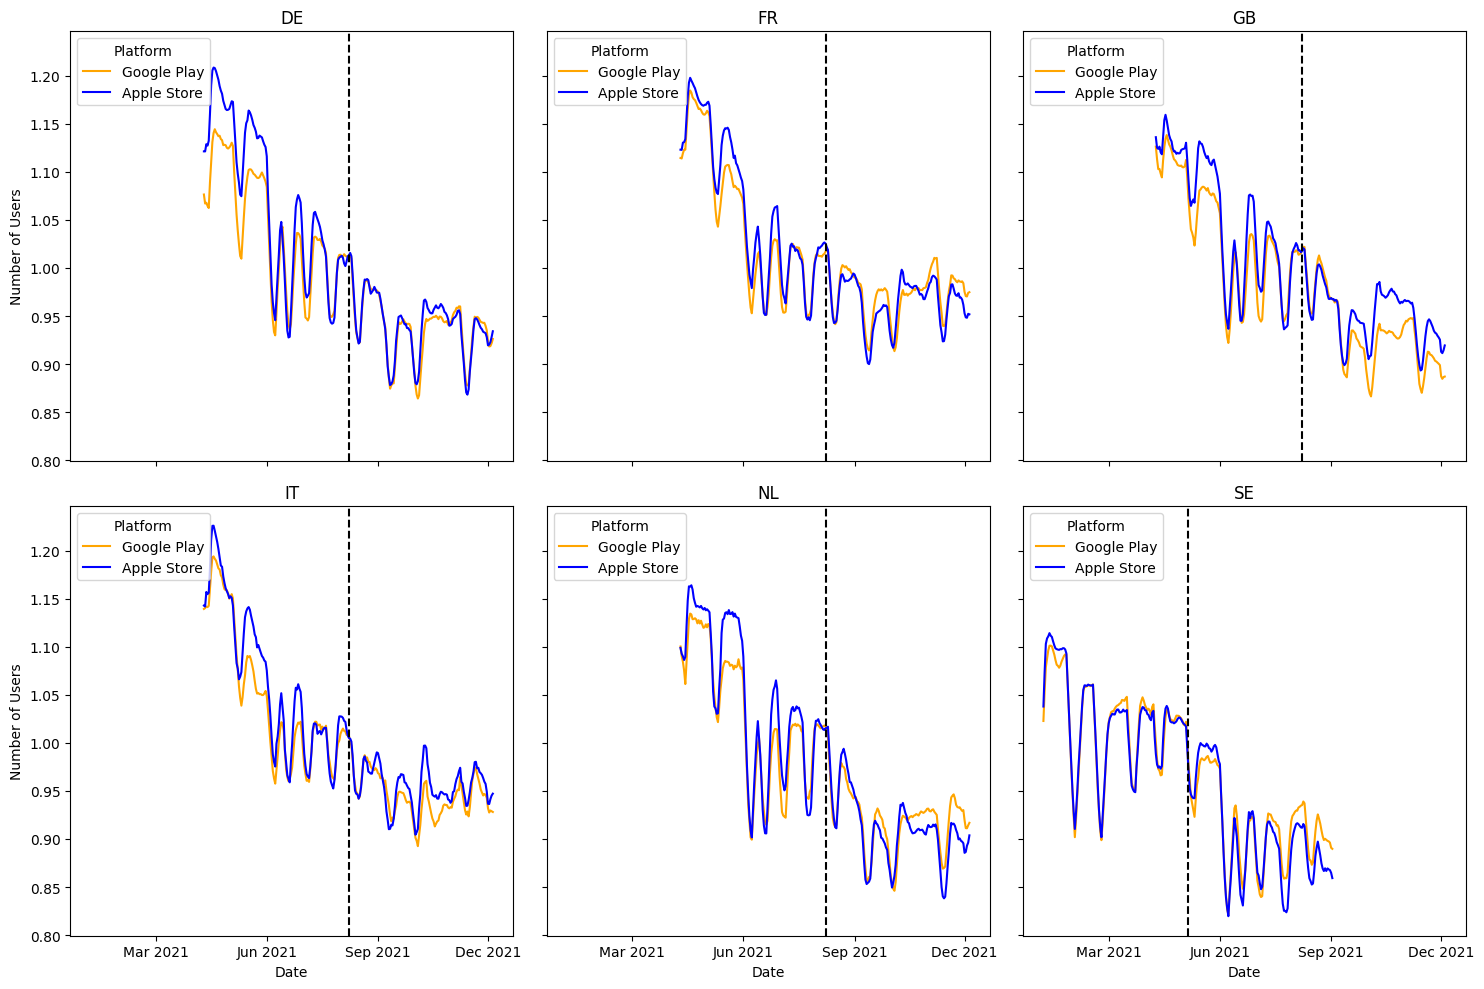

In [178]:
# Definir a paleta de cores
palette = {
    'ios': 'blue',
    'android': 'orange'
}

# Definir o mapeamento de nomes para a legenda
legend_mapping = {
    'ios': 'Apple Store',
    'android': 'Google Play'
}

# Plotar a Figura 1
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, (country, date) in enumerate(price_change_dates.items()):
    ax = axes[i]
    country_data = data_fig1[data_fig1['country'] == country]
    sns.lineplot(data=country_data, x='dt', y='userssmooth', hue='platform', palette=palette, ax=ax)
    ax.axvline(pd.to_datetime(date), color='black', linestyle='--')
    ax.set_title(country)
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Users')
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    # Ajustar a legenda para que não haja duplicação
    handles, labels = ax.get_legend_handles_labels()
    new_labels = [legend_mapping[label] for label in labels]
    ax.legend(handles, new_labels, title='Platform', loc='upper left')

plt.tight_layout()
plt.show()


## Tabela de estatísticas descritivas

Faça a tabela de estatísticas descritivas do conjunto de dados a semelhança da Tabela 1 do artigo. Entranto, além de incluir as médias dos jogos por país, inclua também o desvio padrão de cada uma das variáveis: norm_users, norm_purch_users e norm_videos.

In [179]:
descriptive_stats = dados.groupby(['country', 'platform', 'game']).agg(
    mean_norm_users=('norm_users', 'mean'),
    sd_norm_users=('norm_users', 'std'),
    mean_norm_purch_users=('norm_purch_users', 'mean'),
    sd_norm_purch_users=('norm_purch_users', 'std'),
    mean_norm_videos=('norm_videos', 'mean'),
    sd_norm_videos=('norm_videos', 'std')
).reset_index()

descriptive_stats

,country,platform,game,mean_norm_users,sd_norm_users,mean_norm_purch_users,sd_norm_purch_users,mean_norm_videos,sd_norm_videos
0,DE,android,W1,0.986999,0.079744,1.042657,0.644064,0.987123,0.234731
1,DE,android,W2,1.026635,0.065010,1.194109,0.689547,1.018512,0.065176
2,DE,android,W3,0.965948,0.160350,1.463208,1.189009,1.007930,0.140109
3,DE,android,W4,1.133115,0.094652,1.000243,0.276670,9.790313,10.315897
4,DE,android,W5,1.018541,0.091670,1.030359,0.377434,0.962997,0.168708
5,DE,ios,W1,1.002347,0.097638,1.002490,0.720215,0.984577,0.228476
6,DE,ios,W2,0.994493,0.072249,0.926018,0.477146,1.037258,0.134700
7,DE,ios,W3,0.979524,0.178910,1.299271,1.110314,1.046772,0.161282
8,DE,ios,W4,1.078051,0.110602,0.962793,0.302982,8.342493,8.819220
9,DE,ios,W5,1.011111,0.105917,0.985268,0.294085,0.944832,0.157093


In [180]:
pivot_table = descriptive_stats.pivot_table(index=['country', 'game'], 
                                            columns='platform', 
                                            values=['mean_norm_users', 'sd_norm_users', 'mean_norm_purch_users', 'sd_norm_purch_users', 'mean_norm_videos', 'sd_norm_videos'])
pivot_table.columns = ['_'.join(col).strip() for col in pivot_table.columns.values]
pivot_table.reset_index(inplace=True)

pivot_table = pivot_table[['country', 'game', 'mean_norm_purch_users_android', 'sd_norm_purch_users_android', 'mean_norm_users_android', 'sd_norm_users_android', 'mean_norm_videos_android', 'sd_norm_videos_android', 'mean_norm_users_ios', 'sd_norm_users_ios', 'mean_norm_purch_users_ios', 'sd_norm_purch_users_ios', 'mean_norm_videos_ios', 'sd_norm_videos_ios']]
pivot_table

,country,game,mean_norm_purch_users_android,sd_norm_purch_users_android,mean_norm_users_android,sd_norm_users_android,mean_norm_videos_android,sd_norm_videos_android,mean_norm_users_ios,sd_norm_users_ios,mean_norm_purch_users_ios,sd_norm_purch_users_ios,mean_norm_videos_ios,sd_norm_videos_ios
0,DE,W1,1.042657,0.644064,0.986999,0.079744,0.987123,0.234731,1.002347,0.097638,1.002490,0.720215,0.984577,0.228476
1,DE,W2,1.194109,0.689547,1.026635,0.065010,1.018512,0.065176,0.994493,0.072249,0.926018,0.477146,1.037258,0.134700
2,DE,W3,1.463208,1.189009,0.965948,0.160350,1.007930,0.140109,0.979524,0.178910,1.299271,1.110314,1.046772,0.161282
3,DE,W4,1.000243,0.276670,1.133115,0.094652,9.790313,10.315897,1.078051,0.110602,0.962793,0.302982,8.342493,8.819220
4,DE,W5,1.030359,0.377434,1.018541,0.091670,0.962997,0.168708,1.011111,0.105917,0.985268,0.294085,0.944832,0.157093
5,FR,W1,1.116857,0.680765,1.009578,0.071611,1.040136,0.208325,1.012830,0.081098,0.970115,0.615583,0.954831,0.178472
6,FR,W2,0.945290,0.504991,1.056284,0.084940,1.051498,0.068208,1.040188,0.069064,1.191288,0.614787,1.068805,0.093616
7,FR,W3,1.035103,0.644377,0.971902,0.151354,1.023521,0.131421,0.980327,0.158949,1.219512,0.867883,1.025691,0.133192
8,FR,W4,0.867407,0.296449,1.117039,0.088216,7.273653,7.262744,1.140111,0.152455,0.836094,0.291944,6.140542,6.157786
9,FR,W5,0.965348,0.300918,1.032737,0.075819,0.969061,0.149908,1.038356,0.116478,1.034920,0.293126,0.987014,0.139978


In [181]:
latex_table = pivot_table.to_latex(index=False, float_format="%.2f")
print(latex_table)

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
country & game & mean_norm_purch_users_android & sd_norm_purch_users_android & mean_norm_users_android & sd_norm_users_android & mean_norm_videos_android & sd_norm_videos_android & mean_norm_users_ios & sd_norm_users_ios & mean_norm_purch_users_ios & sd_norm_purch_users_ios & mean_norm_videos_ios & sd_norm_videos_ios \\
\midrule
DE & W1 & 1.04 & 0.64 & 0.99 & 0.08 & 0.99 & 0.23 & 1.00 & 0.10 & 1.00 & 0.72 & 0.98 & 0.23 \\
DE & W2 & 1.19 & 0.69 & 1.03 & 0.07 & 1.02 & 0.07 & 0.99 & 0.07 & 0.93 & 0.48 & 1.04 & 0.13 \\
DE & W3 & 1.46 & 1.19 & 0.97 & 0.16 & 1.01 & 0.14 & 0.98 & 0.18 & 1.30 & 1.11 & 1.05 & 0.16 \\
DE & W4 & 1.00 & 0.28 & 1.13 & 0.09 & 9.79 & 10.32 & 1.08 & 0.11 & 0.96 & 0.30 & 8.34 & 8.82 \\
DE & W5 & 1.03 & 0.38 & 1.02 & 0.09 & 0.96 & 0.17 & 1.01 & 0.11 & 0.99 & 0.29 & 0.94 & 0.16 \\
FR & W1 & 1.12 & 0.68 & 1.01 & 0.07 & 1.04 & 0.21 & 1.01 & 0.08 & 0.97 & 0.62 & 0.95 & 0.18 \\
FR & W2 & 0.95 & 0.50 & 1.06 & 0.08 & 1.05 & 0.07 & 1.04 

## Figura 7

Recrie a Fig. 7 do artigo. Ela mostra a “Taxa de conversão por dia em W1 em seis países europeus em torno de mudanças de preços na Apple A figura mostra o número diário de compras no aplicativo / número de usuários para janelas de 120 dias em ambos os lados de uma mudança de preços na Apple em seis países europeus. O momento das mudanças de preço é ilustrado por barras verticais e o número de usuários por dia e plataforma são médias móveis de sete dias, normalizadas para que o número diário de compras no aplicativo / número de usuários para 30 dias antes da mudança de preço seja definido como 1.” A taxa de conversão normalizada está na variável purchsmooth.

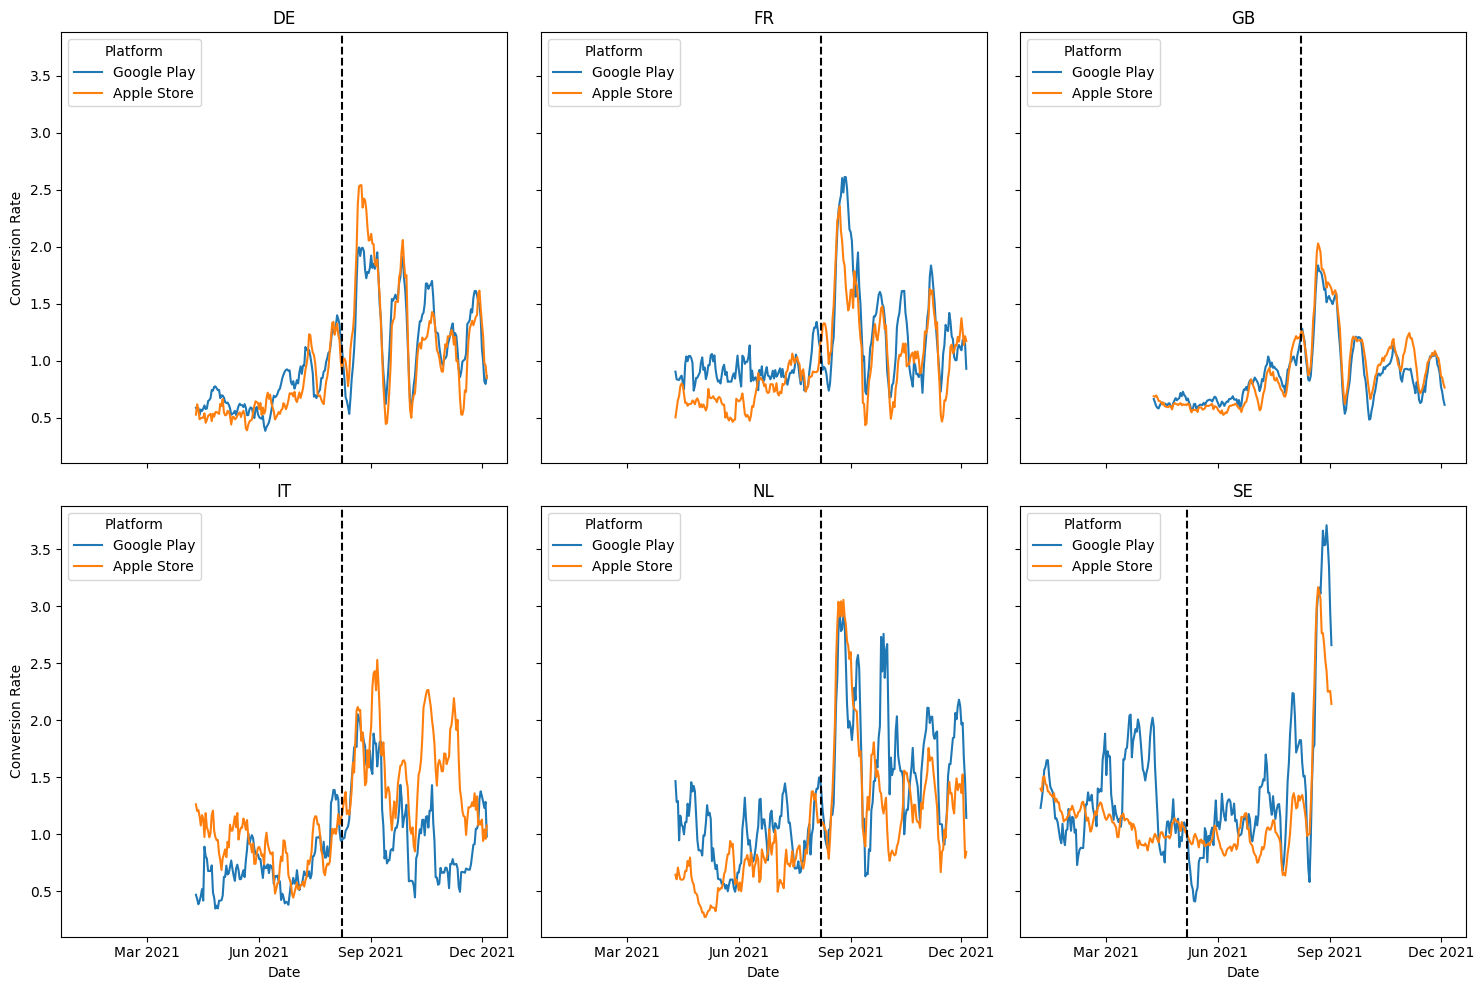

In [182]:
# Plotar a Figura 7
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, (country, date) in enumerate(price_change_dates.items()):
    ax = axes[i]
    country_data = data_fig1[data_fig1['country'] == country]
    sns.lineplot(data=country_data, x='dt', y='purchsmooth', hue='platform', ax=ax)
    ax.axvline(pd.to_datetime(date), color='black', linestyle='--')
    ax.set_title(country)
    ax.set_xlabel('Date')
    ax.set_ylabel('Conversion Rate')
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    # Ajustar a legenda para que não haja duplicação
    handles, labels = ax.get_legend_handles_labels()
    new_labels = [legend_mapping[label] for label in labels]
    ax.legend(handles, new_labels, title='Platform', loc='upper left')

plt.tight_layout()
plt.show()


# Tabela 4

Recrie a Tabela 4 painel A do artigo. Você deve inferir quais são as variáveis utilizadas na regressão dos autores, entretanto, a interação entre country e game é representada pela variável cgn. Além disso, os dados não nos fornecem a variação de preços ponderada, portanto não conseguimos computar a linha Price change. Se tomarem aqueles valores das variações de preço como dados, calculem a linha Elasticity.

In [183]:
import statsmodels.formula.api as smf

In [184]:
# Definir o modelo de regressão
# Usando robust standard errors conforme dito na descrição abaixo da tabela original
model_full_sample = smf.ols('lnpurch_users ~ postxapple + apple + C(cgn) + C(dt)', data=dados).fit(cov_type='HC1')

In [185]:

# Separar os dados por jogo e ajustar os modelos
models_by_game = {}
for game in dados['game'].unique():
    game_data = dados[dados['game'] == game]
    models_by_game[game] = smf.ols('lnpurch_users ~ postxapple + apple + C(country) + C(dt)', data=game_data).fit(cov_type='HC1')

In [186]:
# Coletar os coeficientes de "postxapple" de cada modelo
postxapple_coef_full = model_full_sample.params['postxapple']
postxapple_coef_games = [models_by_game[game].params['postxapple'] for game in models_by_game]

# Coletar os erros padrão dos coeficientes "postxapple"
stderr_full = model_full_sample.bse['postxapple']
stderr_games = [models_by_game[game].bse['postxapple'] for game in models_by_game]

In [187]:
# Coletar os p-valores dos coeficientes "postxapple"
pvalues_full = model_full_sample.pvalues['postxapple']
pvalues_games = [models_by_game[game].pvalues['postxapple'] for game in models_by_game]

# Função para formatar os coeficientes com asteriscos de significância
def format_coef(coef, pvalue):
    if pvalue < 0.001:
        return f"{coef:.3f}***"
    elif pvalue < 0.01:
        return f"{coef:.3f}**"
    elif pvalue < 0.05:
        return f"{coef:.3f}*"
    elif pvalue < 0.1:
        return f"{coef:.3f}*"
    else:
        return f"{coef:.3f}"

In [188]:
# Aplicar a função de formatação aos coeficientes
formatted_coefs = [format_coef(postxapple_coef_full, pvalues_full)] + [format_coef(coef, pval) for coef, pval in zip(postxapple_coef_games, pvalues_games)]

In [189]:
# Coletar o número de observações e o R² ajustado
n_obs_full = model_full_sample.nobs
r2_adj_full = model_full_sample.rsquared_adj

n_obs_games = [models_by_game[game].nobs for game in models_by_game]
r2_adj_games = [models_by_game[game].rsquared_adj for game in models_by_game]

In [190]:
# Variações de preço para cada jogo
price_changes = [-0.105, -0.114, -0.102, -0.126, -0.092, -0.097]


# Calcular as elasticidades
elasticities = np.array([postxapple_coef_full] + postxapple_coef_games) / np.array(price_changes)

In [191]:
# Criar a tabela de resultados
results_table = pd.DataFrame({
    'Post x Apple': formatted_coefs,
    'Std. Error': [stderr_full] + stderr_games,
    'Num. Obs.': [n_obs_full] + n_obs_games,
    'R² Adj.': [r2_adj_full] + r2_adj_games,
    'Price Change': price_changes,
    'Elasticities': elasticities
}, index=['Full Sample'] + list(models_by_game.keys()))

# Formatar os resultados
results_table['Std. Error'] = results_table['Std. Error'].map('({:.3f})'.format)
results_table['R² Adj.'] = results_table['R² Adj.'].map('{:.3f}'.format)
results_table['Price Change'] = results_table['Price Change'].map('{:.3f}'.format)
results_table['Elasticities'] = results_table['Elasticities'].map('{:.3f}'.format)

In [192]:
# Exibir a tabela
final = results_table.transpose()
final

,Full Sample,W1,W2,W3,W4,W5
Post x Apple,0.158***,0.169***,0.161***,-0.073,0.381***,0.104***
Std. Error,(0.019),(0.034),(0.046),(0.049),(0.026),(0.028)
Num. Obs.,12655.0,2772.0,2069.0,2077.0,2877.0,2860.0
R² Adj.,0.106,0.564,0.109,0.265,0.216,0.259
Price Change,-0.105,-0.114,-0.102,-0.126,-0.092,-0.097
Elasticities,-1.500,-1.480,-1.574,0.576,-4.144,-1.070


In [193]:
final_latex = final.to_latex( float_format="%.2f", escape=False)
print(final_latex)

\begin{tabular}{lllllll}
\toprule
 & Full Sample & W1 & W2 & W3 & W4 & W5 \\
\midrule
Post x Apple & 0.158*** & 0.169*** & 0.161*** & -0.073 & 0.381*** & 0.104*** \\
Std. Error & (0.019) & (0.034) & (0.046) & (0.049) & (0.026) & (0.028) \\
Num. Obs. & 12655.00 & 2772.00 & 2069.00 & 2077.00 & 2877.00 & 2860.00 \\
R² Adj. & 0.106 & 0.564 & 0.109 & 0.265 & 0.216 & 0.259 \\
Price Change & -0.105 & -0.114 & -0.102 & -0.126 & -0.092 & -0.097 \\
Elasticities & -1.500 & -1.480 & -1.574 & 0.576 & -4.144 & -1.070 \\
\bottomrule
\end{tabular}

